In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "classification"
CHAPTER_ID = "medical_appointment"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## Get Data

In [2]:
import pandas as pd
import os
medical_path = os.path.join("classification", "data", "KaggleV2-May-2016.csv")
medical = pd.read_csv(medical_path)
medical.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
medical["Gender"].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [5]:
medical.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## plot histograms for all numerical attributes

Saving figure attribute_histogram_plots


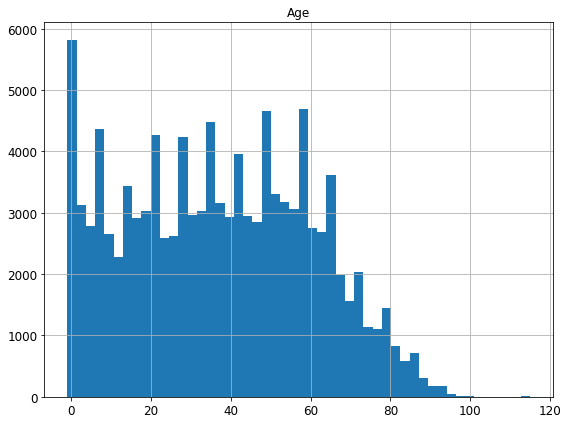

In [6]:
%matplotlib inline
medical_num = ["Age"]
medical.hist(medical_num, bins=50, figsize=(8, 6))
save_fig("attribute_histogram_plots")
plt.show()

In [7]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [8]:
medical["Neighbourhood"].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In [9]:
medical["Scholarship"].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [10]:
medical["Hipertension"].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [11]:
medical["Diabetes"].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [12]:
medical["Alcoholism"].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [13]:
medical["Handcap"].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [14]:
medical["SMS_received"].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

## Data cleaning
Some observations have age less than 0 and have Handcap not equals 0 or 1.Elimate these observations from our dataset. Feature neibourhood has too many catelogies, delete this feature from dataset. Also delete irrelevant features PatientId and AppointmentID.

In [15]:
medical_clean = medical[medical["Age"] >= 0]
medical_clean = medical_clean[medical_clean["Handcap"] <= 1]
del medical_clean["Neighbourhood"]
del medical_clean["PatientId"]
del medical_clean["AppointmentID"]
medical_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110327 non-null object
ScheduledDay      110327 non-null object
AppointmentDay    110327 non-null object
Age               110327 non-null int64
Scholarship       110327 non-null int64
Hipertension      110327 non-null int64
Diabetes          110327 non-null int64
Alcoholism        110327 non-null int64
Handcap           110327 non-null int64
SMS_received      110327 non-null int64
No-show           110327 non-null object
dtypes: int64(7), object(4)
memory usage: 10.1+ MB


# Data Transform
Transform column "Age" and "No-show" to integers. 

In [16]:
# Features in Gender change to integers(F-0, M-1)
medical_clean['Gender'] = medical_clean['Gender']\
    .apply(lambda x: int(0.0) if(x == 'F') else int(1.0))

# Features in No-show change to integers(no-0, yes-1)
medical_clean['No-show'] = medical_clean['No-show']\
    .apply(lambda x: int(0.0) if(x == 'No') else int(1.0))

medical_clean.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,0
1,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,0
2,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,0
3,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,0
4,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,0


In [17]:
medical_clean["No-show"].value_counts()/len(medical_clean)

0    0.798073
1    0.201927
Name: No-show, dtype: float64

## Create new features
Based on the feature "ScheduledDay" and "AppointmentDay", we create a new feature "timedelta" represent the time period between above time slots.

In [18]:
medical_tr = medical_clean.copy()
# Breaking Date Features(ScheduledDay, AppointmentDay) into Date Components
for col in ['ScheduledDay', 'AppointmentDay']:
    for i, component in enumerate(['year', 'month', 'day']):
        medical_tr['%s_%s' % (col, component)] = medical_tr[col]\
            .apply(lambda x: int(x.split('T')[0].split('-')[i]))
medical_tr.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_year,ScheduledDay_month,ScheduledDay_day,AppointmentDay_year,AppointmentDay_month,AppointmentDay_day
0,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,0,2016,4,29,2016,4,29
1,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,0,2016,4,29,2016,4,29
2,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,0,2016,4,29,2016,4,29
3,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,0,2016,4,29,2016,4,29
4,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,0,2016,4,29,2016,4,29


In [19]:
from datetime import datetime


def calculate_time_period(s_y, s_m, s_d, a_y, a_m, a_d):
    m = len(s_y)
    day = np.zeros(shape=(m,))
    for i in range(m):
        day[i] = (datetime(a_y[i], a_m[i], a_d[i]) - datetime(s_y[i], s_m[i], s_d[i])).days
    return day


In [20]:
from sklearn.base import BaseEstimator, TransformerMixin

s_y, s_m, s_d = 11, 12, 13
a_y, a_m, a_d = 14, 15, 16
    
    
class AttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_period=True):
        self.add_period = add_period
        
    def fit_transform(self, X, y=None, **fit_params):
        await_day = calculate_time_period(X[:, s_y], X[:, s_m], X[:, s_d], 
                                          X[:, a_y], X[:, a_m], X[:, a_d])
        return np.c_[await_day]


attr_adder = AttrAdder()
medical_extra_attr = attr_adder.fit_transform(medical_tr.values)

In [21]:
del medical_tr["AppointmentDay"]
del medical_tr["ScheduledDay"]
del medical_tr["AppointmentDay_year"]
del medical_tr["AppointmentDay_month"]
del medical_tr["AppointmentDay_day"]
del medical_tr["ScheduledDay_year"]
del medical_tr["ScheduledDay_month"]
del medical_tr["ScheduledDay_day"]


In [22]:
medical_prepared = pd.DataFrame(np.hstack((medical_tr, medical_extra_attr)), 
                                columns=list(medical_tr.columns)+["AwaitDay"])
medical_prepared.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitDay
0,0.0,62.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,56.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## Create train and test set
Do stratified sampling based on the label category(No-show)

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(medical_prepared, 
                                           medical_prepared['No-show']):    
    train_set = medical_prepared.iloc[train_index]
    test_set = medical_prepared.iloc[test_index]

In [24]:
train_set["No-show"].value_counts()/len(train_set)

0.0    0.798076
1.0    0.201924
Name: No-show, dtype: float64

In [25]:
test_set["No-show"].value_counts()/len(test_set)

0.0    0.79806
1.0    0.20194
Name: No-show, dtype: float64

In [26]:
train_feats = train_set.drop("No-show", axis=1)  # drop labels for training set
train_label = train_set["No-show"].copy()
test_feats = test_set.drop("No-show", axis=1)  # drop labels for test set
test_label = test_set["No-show"].copy

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=42)
y_forest = cross_val_predict(forest_clf, train_feats.values, train_label.values, 
                                    cv=5, method="predict_proba")

In [28]:
from sklearn.metrics import roc_curve

y_scores_forest = y_forest[:, 1]  # score = probability of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_label.values,
                                                      y_scores_forest)

Saving figure roc_curve_forest_plot


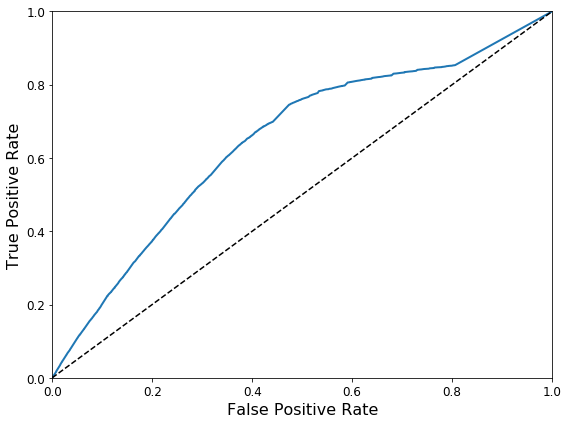

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
save_fig("roc_curve_forest_plot")
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score

roc_auc_score(train_label.values, y_scores_forest)

0.646184079484627